Python has a lot of basic functionality. But for a lot of what we're going to do we need additional tools for data handing, plotting, statistics, etc... 

We import these as needed using the "import" command.

In [1]:
# we will be using a data handling library called pandas
# which is basically a python spreadsheet

import pandas as pd

# this is here to shut off some annoying warnings from pandas
pd.options.mode.chained_assignment = None

# matplotlib is one of the main plotting libraries we're going to use
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline


# the other plotting library is seaborn - we'll use both during the class

import seaborn as sns

# numpy and scipy are for handling numerical and scientific data

import numpy as np
import scipy as sp

import statsmodels.formula.api as smf # basic statistical modeling

In [3]:
df = pd.read_csv("data/galton/galton.csv")

In [4]:
df.head()

,family,h_father,h_mother,h_parentmean,n_children,childnum,childgender,h_child
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5


In [5]:
df.shape

(934, 8)

In [6]:
df.describe()

,h_father,h_mother,h_parentmean,n_children,childnum,h_child
count,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000
mean,69.197109,64.089293,69.206773,6.171306,3.585653,66.745931
std,2.476479,2.290886,1.802370,2.729025,2.361410,3.579251
min,62.000000,58.000000,64.400000,1.000000,1.000000,56.000000
25%,68.000000,63.000000,68.140000,4.000000,2.000000,64.000000
50%,69.000000,64.000000,69.248000,6.000000,3.000000,66.500000
75%,71.000000,65.875000,70.140000,8.000000,5.000000,69.700000
max,78.500000,70.500000,75.430000,15.000000,15.000000,79.000000


Text(0.5, 1.0, 'Heights of parents by sex')

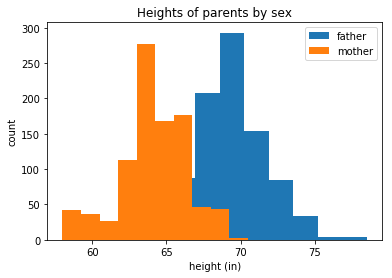

In [7]:
plt.hist(df.h_father,bins=10,label="father")
plt.hist(df.h_mother,bins=10,label="mother")
plt.legend()
plt.xlabel("height (in)")
plt.ylabel("count")
plt.title("Heights of parents by sex")

In [8]:
df[df.childgender == 'female'].head()

,family,h_father,h_mother,h_parentmean,n_children,childnum,childgender,h_child
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
6,2,75.5,66.5,73.66,4,3,female,65.5
7,2,75.5,66.5,73.66,4,4,female,65.5


Text(0.5, 1.0, 'Heights of children by sex')

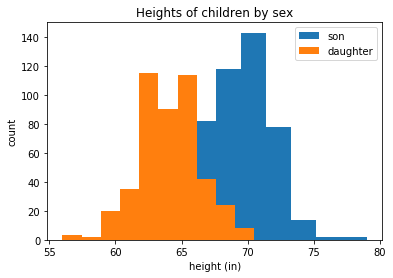

In [9]:
dfp = df[df.childgender == 'male']
plt.hist(dfp.h_child,bins=10,label="son")

dfp = df[df.childgender == 'female']
plt.hist(dfp.h_child,bins=10,label="daughter")

plt.legend()
plt.xlabel("height (in)")
plt.ylabel("count")
plt.title("Heights of children by sex")

There is a clear height difference between males and females. Should we correct for it?

In [10]:
print ("Mean of father's height: ", df['h_father'].mean())
print ("Mean of mother's height: ", df['h_mother'].mean())
print ("Ratio: ", df['h_father'].mean()/df['h_mother'].mean())

Mean of father's height:  69.19710920770873
Mean of mother's height:  64.08929336188437
Ratio:  1.0796984266464407


Text(0.5, 1.0, 'Heights of parents by sex')

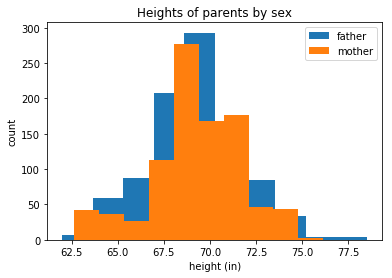

In [11]:
plt.hist(df.h_father,bins=10,label="father")
plt.hist(df.h_mother * 1.08,bins=10,label="mother")
plt.legend()
plt.xlabel("height (in)")
plt.ylabel("count")
plt.title("Heights of parents by sex")

Text(0.5, 1.0, 'Heights of parents by sex')

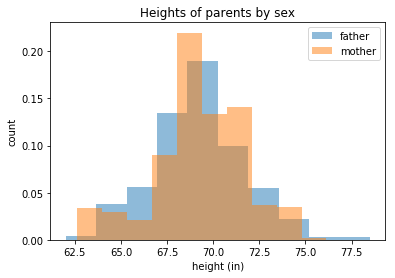

In [12]:
plt.hist(df.h_father,bins=10,label="father",density=True,alpha=.5)
plt.hist(df.h_mother * 1.08,bins=10,label="mother",density=True,alpha=.5)
plt.legend()
plt.xlabel("height (in)")
plt.ylabel("count")
plt.title("Heights of parents by sex")

Is same true for children?

In [13]:
daughter_mean = df[df['childgender'] == 'female']['h_child'].mean()
print ("Mean of daughter's height: ", daughter_mean)

son_mean = df[df['childgender'] == 'male']['h_child'].mean()

print ("Mean of mother's height: ", son_mean)
print ("Ratio: ", son_mean / daughter_mean)

Mean of daughter's height:  64.10397350993381
Mean of mother's height:  69.2340956340957
Ratio:  1.080028145577698


Looks good (almost too good ....)

In [17]:
# create adjusted columns

df['hc_father'] = df['h_father']
df['hc_mother'] = df['h_mother'] * 1.08

df['hc_child'] = df['h_child']

dft = df[df['childgender'] == 'female']

df.loc[dft.index,'hc_child'] = dft['h_child'] * 1.08

Text(0.5, 1.0, 'Heights of children by sex')

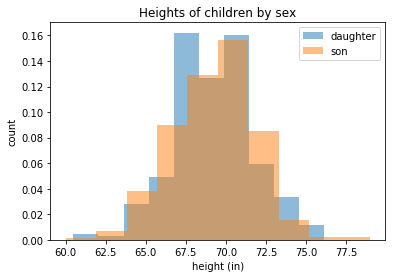

In [18]:
dfp = df[df.childgender == 'female']
plt.hist(dfp.hc_child,bins=10,label="daughter",density=True,alpha=0.5)

dfp = df[df.childgender == 'male']
plt.hist(dfp.hc_child,bins=10,label="son",density=True,alpha=0.5)
plt.legend()
plt.xlabel("height (in)")
plt.ylabel("count")
plt.title("Heights of children by sex")

In [19]:
df['hc_parentmean'] = 0.5 * (df['hc_father'] + df['hc_mother'])

Text(0.5, 1.0, 'parent vs. child height')

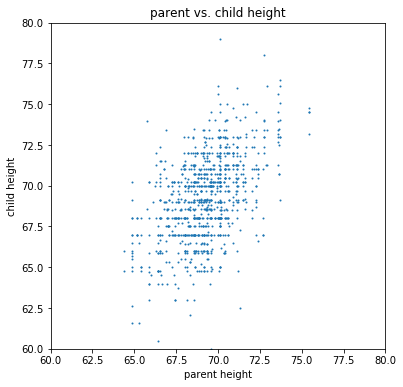

In [20]:
plt.figure(figsize=(6,6))
plt.scatter(df.hc_parentmean,df.hc_child,s=1)
plt.xlim(60,80)
plt.ylim(60,80)
plt.xlabel("parent height")
plt.ylabel("child height")
plt.title("parent vs. child height")

Text(0, 0.5, 'frequency')

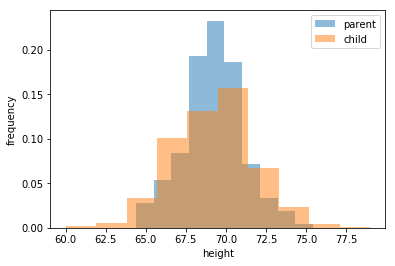

In [21]:
plt.hist(df['hc_parentmean'],density=True,alpha=.5,label='parent')
plt.hist(df['hc_child'],density=True,alpha=.5,label='child')
plt.legend()
plt.xlabel("height")
plt.ylabel("frequency")

Text(0.5, 1.0, 'father vs. child height')

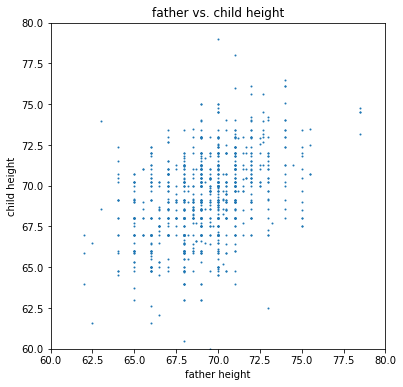

In [22]:
plt.figure(figsize=(6,6))
plt.scatter(df.hc_father,df.hc_child,s=1)
plt.xlim(60,80)
plt.ylim(60,80)
plt.xlabel("father height")
plt.ylabel("child height")
plt.title("father vs. child height")

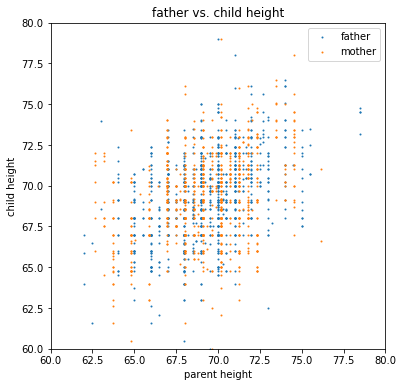

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(df.hc_father,df.hc_child,s=1,label='father')
plt.scatter(df.hc_mother,df.hc_child,s=1,label='mother')
plt.xlim(60,80)
plt.ylim(60,80)
plt.xlabel("parent height")
plt.ylabel("child height")
plt.title("father vs. child height")
plt.legend()

How good is the fit?

In [24]:
np.corrcoef(df.hc_parentmean,df.hc_child)

array([[1.        , 0.49701225],
       [0.49701225, 1.        ]])

In [25]:
sp.stats.pearsonr(df.hc_parentmean,df.hc_child)

(0.49701225336482485, 1.9957624357919138e-59)

In [26]:
sp.stats.linregress(df.hc_parentmean,df.hc_child)

LinregressResult(slope=0.7125849916953029, intercept=19.917512779548566, rvalue=0.49701225336482424, pvalue=1.995762435792103e-59, stderr=0.04075238205342484)

In [27]:
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df.hc_parentmean,df.hc_child)

In [28]:
model = smf.ols(formula='hc_child ~ hc_parentmean', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hc_child   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     305.8
Date:                Tue, 22 Jan 2019   Prob (F-statistic):           2.00e-59
Time:                        11:17:13   Log-Likelihood:                -2079.0
No. Observations:                 934   AIC:                             4162.
Df Residuals:                     932   BIC:                             4172.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        19.9175      2.821      7.060      0.000      14.381      25.454
hc_parentmean     0.7126      0.041     17.486      0.000       0.633       0.793
==============================================================================
Omnibus:                        8.229   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               10.082
Skew:                          -0.116   Prob(JB):                      0.00647
Kurtosis:                       3.453   Cond. No.                     2.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
df['hc_predm'] = 19.9175 + 0.7126 * df['hc_parentmean']

Text(0, 0.5, 'predicted child height')

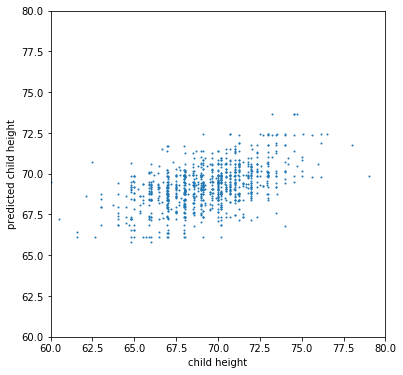

In [35]:
plt.figure(figsize=(6,6))
plt.scatter(df.hc_child,df.hc_predm, s=1)
plt.xlim(60,80)
plt.ylim(60,80)
plt.xlabel("child height")
plt.ylabel("predicted child height")


Text(0, 0.5, 'frequency')

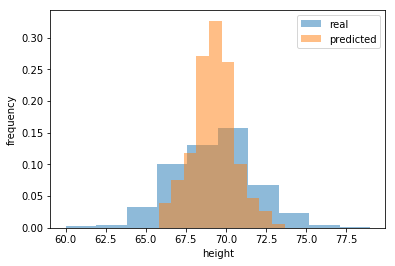

In [37]:
plt.hist(df['hc_child'],density=True,alpha=.5,label='real')
plt.hist(df['hc_predm'],density=True,alpha=.5,label='predicted')
plt.legend()
plt.xlabel("height")
plt.ylabel("frequency")

Why do you think there is such a different distribution? 

In [38]:
model = smf.ols(formula='hc_child ~ hc_father + hc_mother', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hc_child   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     156.6
Date:                Tue, 22 Jan 2019   Prob (F-statistic):           2.31e-59
Time:                        11:21:02   Log-Likelihood:                -2076.1
No. Observations:                 934   AIC:                             4158.
Df Residuals:                     931   BIC:                             4173.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.9250      2.814      7.081      0.000      14.403      25.447
hc_father      0.4087      0.030     13.791      0.000       0.351       0.467
hc_mother      0.3038      0.030     10.241      0.000       0.246       0.362
==============================================================================
Omnibus:                        8.375   Durbin-Watson:                   1.552
Prob(Omnibus):                  0.015   Jarque-Bera (JB):               10.633
Skew:                          -0.103   Prob(JB):                      0.00491
Kurtosis:                       3.480   Cond. No.                     3.76e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
model.params

Intercept    19.924951
hc_father     0.408706
hc_mother     0.303786
dtype: float64

In [40]:
df['hc_pred_mf'] = 19.925 + .4087 * df['hc_father'] + .3038 * df['hc_mother']

Text(0.5, 1.0, 'comparison of height predictions')

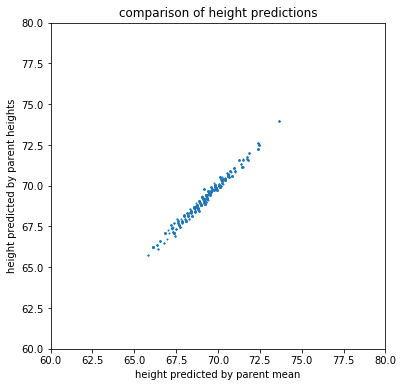

In [42]:
plt.figure(figsize=(6,6))
plt.scatter(df.hc_predm,df.hc_pred_mf,s=1)
plt.xlim(60,80)
plt.ylim(60,80)
plt.xlabel("height predicted by parent mean")
plt.ylabel("height predicted by parent heights")
plt.title("comparison of height predictions")



In [43]:
x = df.hc_parentmean.values
y = df.hc_child.values
x = x[:,np.newaxis]

y0_slope, _,_,_ = np.linalg.lstsq(x,y)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


In [44]:
plot_x = np.linspace(60,80,500)

Text(0.5, 1.0, 'fits of parent and child heights')

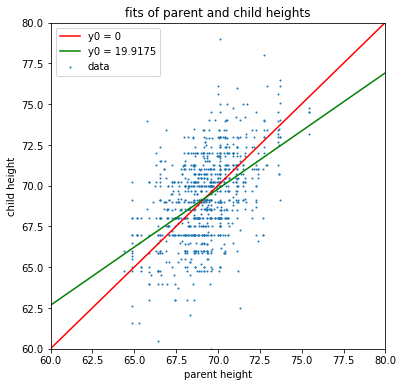

In [45]:
plt.figure(figsize=(6,6))

plt.scatter(df.hc_parentmean,df.hc_child, s=1, label='data')

plt.xlim(60,80)
plt.ylim(60,80)
plt.xlabel("parent height")
plt.ylabel("child height")

plt.plot(plot_x,y0_slope*plot_x,c='red',label = "y0 = 0")
plt.plot(plot_x,19.9175 + 0.7126 * plot_x,c='green', label="y0 = 19.9175")
plt.legend()
plt.title("fits of parent and child heights")


Text(0.5, 1.0, 'relationship between parent and child heights')

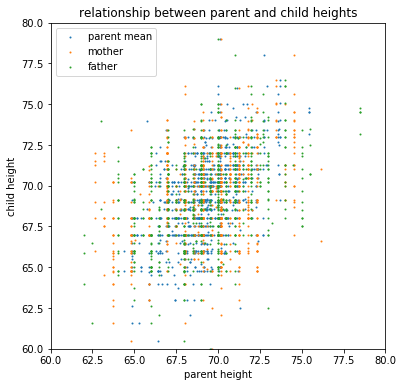

In [46]:
plt.figure(figsize=(6,6))

plt.scatter(df.hc_parentmean,df.hc_child, s=1, label='parent mean')
plt.scatter(df.hc_mother,df.hc_child, s=1, label='mother')
plt.scatter(df.hc_father,df.hc_child, s=1, label='father')

plt.xlim(60,80)
plt.ylim(60,80)
plt.xlabel("parent height")
plt.ylabel("child height")

plt.legend()
plt.title("relationship between parent and child heights")


Text(0.5, 1.0, 'Heights of parents by sex')

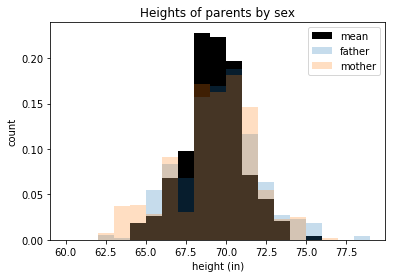

In [47]:
bins = np.arange(60,80,1)
plt.hist(df.hc_parentmean,bins=bins,label="mean",density=True,color='black')
plt.hist(df.hc_father,bins=bins,label="father",density=True,alpha=.25)
plt.hist(df.hc_mother,bins=bins,label="mother",density=True,alpha=.25)

plt.legend()
plt.xlabel("height (in)")
plt.ylabel("count")
plt.title("Heights of parents by sex")

Text(0.5, 1.0, 'height of father vs. mother')

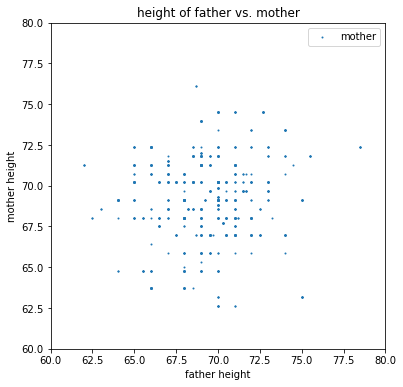

In [49]:
plt.figure(figsize=(6,6))

plt.scatter(df.hc_father,df.hc_mother, s=1, label='mother')

plt.xlim(60,80)
plt.ylim(60,80)
plt.xlabel("father height")
plt.ylabel("mother height")

plt.legend()
plt.title("height of father vs. mother")


In [50]:
sp.stats.pearsonr(df.hc_father,df.hc_mother)

(0.06036611903664484, 0.06517071113937872)

In [51]:
df.head()

,family,h_father,h_mother,h_parentmean,n_children,childnum,childgender,h_child,hc_father,hc_mother,hc_child,hc_parentmean,hc_pred,hc_predm,hc_pred_mf
0,1,78.5,67.0,75.43,4,1,male,73.2,78.5,72.36,73.200,75.43,73.990918,73.668918,73.990918
1,1,78.5,67.0,75.43,4,2,female,69.2,78.5,72.36,74.736,75.43,73.990918,73.668918,73.990918
2,1,78.5,67.0,75.43,4,3,female,69.0,78.5,72.36,74.520,75.43,73.990918,73.668918,73.990918
3,1,78.5,67.0,75.43,4,4,female,69.0,78.5,72.36,74.520,75.43,73.990918,73.668918,73.990918
4,2,75.5,66.5,73.66,4,1,male,73.5,75.5,71.82,73.500,73.66,72.600766,72.407616,72.600766


In [52]:
pt = pd.pivot_table(df,values=['hc_child'],index=['family'],columns=['childnum'],aggfunc='mean')

In [53]:
pt12 = pt['hc_child'][[1,2]].dropna()

Text(0.5, 1.0, 'comparison of sibling heights')

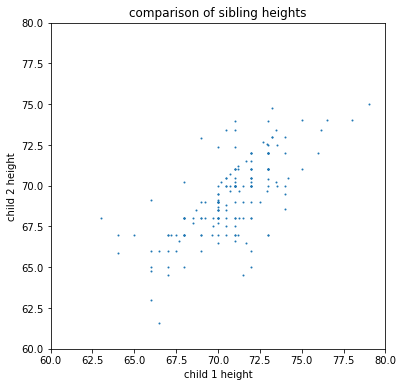

In [56]:
plt.figure(figsize=(6,6))


plt.scatter(pt12[1],pt12[2],s=1)

plt.xlim(60,80)
plt.ylim(60,80)
plt.xlabel("child 1 height")
plt.ylabel("child 2 height")
plt.title("comparison of sibling heights")



Would it help to include siblings in height predictions? Need to associate each child with the heights of their siblings. 

In [68]:
inds = []
sibmeans = []

for index, row in df.iterrows():
    ldf = df[(df.family == row.family) & (df.childnum != row.childnum)]
    if len(ldf > 0):
        inds.append(index)
        sibmeans.append(np.mean(ldf.hc_child.values))
        
df.loc[inds,'hc_sibmean'] = sibmeans

In [75]:
df2 = df.dropna().copy()

Text(0.5, 1.0, 'child vs sibling heights')

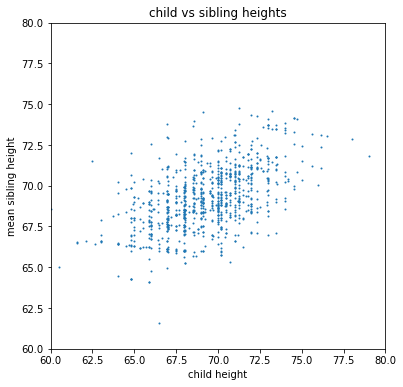

In [77]:
plt.figure(figsize=(6,6))


plt.scatter(df2.hc_child,df2.hc_sibmean,s=1)

plt.xlim(60,80)
plt.ylim(60,80)
plt.xlabel("child height")
plt.ylabel("mean sibling height")
plt.title("child vs sibling heights")



In [78]:
model = smf.ols(formula='hc_child ~ hc_parentmean + hc_sibmean', data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hc_child   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     207.2
Date:                Tue, 22 Jan 2019   Prob (F-statistic):           1.02e-74
Time:                        11:44:29   Log-Likelihood:                -1963.0
No. Observations:                 901   AIC:                             3932.
Df Residuals:                     898   BIC:                             3946.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.2453      2.935      3.491      0.001       4.485      16.006
hc_parentmean     0.3624      0.053      6.805      0.000       0.258       0.467
hc_sibmean        0.4897      0.050      9.851      0.000       0.392       0.587
==============================================================================
Omnibus:                       11.382   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.276
Skew:                          -0.161   Prob(JB):                     0.000794
Kurtosis:                       3.526   Cond. No.                     4.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
model.params

Intercept        10.245329
hc_parentmean     0.362384
hc_sibmean        0.489739
dtype: float64

In [84]:
df2['hc_pred_ps'] = 10.245329 + 0.362384 * df2['hc_parentmean'] + 0.489739 * df2['hc_sibmean']

Text(0.5, 1.0, 'predicted height using parents + sibs')

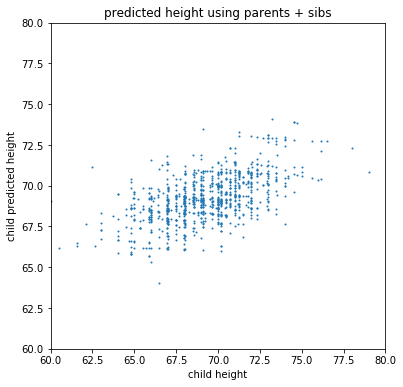

In [87]:
plt.figure(figsize=(6,6))

plt.scatter(df2.hc_child,df2.hc_pred_ps,s=1)

plt.xlim(60,80)
plt.ylim(60,80)
plt.xlabel("child height")
plt.ylabel("child predicted height")
plt.title("predicted height using parents + sibs")

In [88]:
from sklearn.decomposition import PCA

In [89]:
pca = PCA(n_components=2)

In [91]:
ph = df2.hc_parentmean.values
ch = df2.hc_child.values

In [109]:
X = np.column_stack((ph,ch))

In [111]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [112]:
print(pca.explained_variance_ratio_)  

[0.78969199 0.21030801]


In [113]:
print(pca.singular_values_)  

[83.84979429 43.27141006]


In [114]:
pca.components_

array([[ 0.44311555,  0.89646451],
       [-0.89646451,  0.44311555]])

In [115]:
np.mean(X,axis=0)

array([69.2152697 , 69.23484573])

In [119]:
Xc = X - np.mean(X, axis=0)

In [120]:
xplot = np.arange(-20,20,.1)

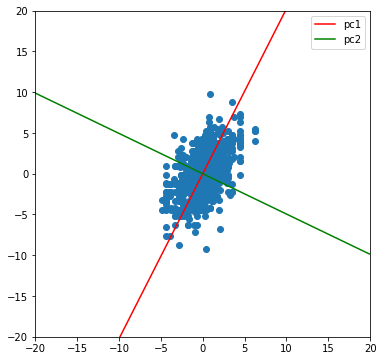

In [134]:
plt.figure(figsize=(6,6))
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.scatter(Xc[:,0],Xc[:,1])
plt.plot(xplot,(.8964/.44311) * xplot, c= 'red', label='pc1')
plt.plot(xplot,(.44311/-.8964) * xplot, c= 'green', label='pc2')
plt.legend()

In [126]:
u, s, vh = np.linalg.svd(X, full_matrices=True)